# 제 5장 머신러닝 프로세스
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%A0%9C5%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

In [1]:
# !pip install pandas==1.1.2
import pandas as pd
# print(pd.__version__)
import sklearn
# print(sklearn.__version__)
import numpy as np
# print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
# print(sns.__version__)

### 성능평가 기법 - 회귀분석

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

# MSE
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(y_test, y_pred)

# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(y_test, y_pred)
rmae = np.sqrt(mse)

# MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)

# MAPE
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test, y_pred)/y_test)) * 100
    return mape
mape = MAPE(y_test, y_pred)

### 성능평가 기법 - 분류분석

In [ ]:
# 정확도
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

# 혼동행렬
form sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# 정밀도, 재현율
form sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# F1 socre
form sklearn.metrics import f1_socre
f1 = f1_score(y_test, y_pred)

# ROC 곡선
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1) # FPR, TPR, 임곗값 할당하기
import matplotlib.pyplot as plt # ROC 곡선 그리기
plt.plot(fpr, tpr)

# AUC 스코어 (1에 가까울수록 성능 우수)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1) # FPR, TPR, 임곗값 할당하기
auc = auc(fpr, tpr)# AUC 값

### 회귀분석
#### 데이터 확인

In [36]:
from sklearn.datasets import load_boston

boston = load_boston()
dt = boston.data
price = boston.target

df = pd.DataFrame(dt, columns=boston.feature_names)
df['price'] = price
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
df.shape

(506, 14)

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

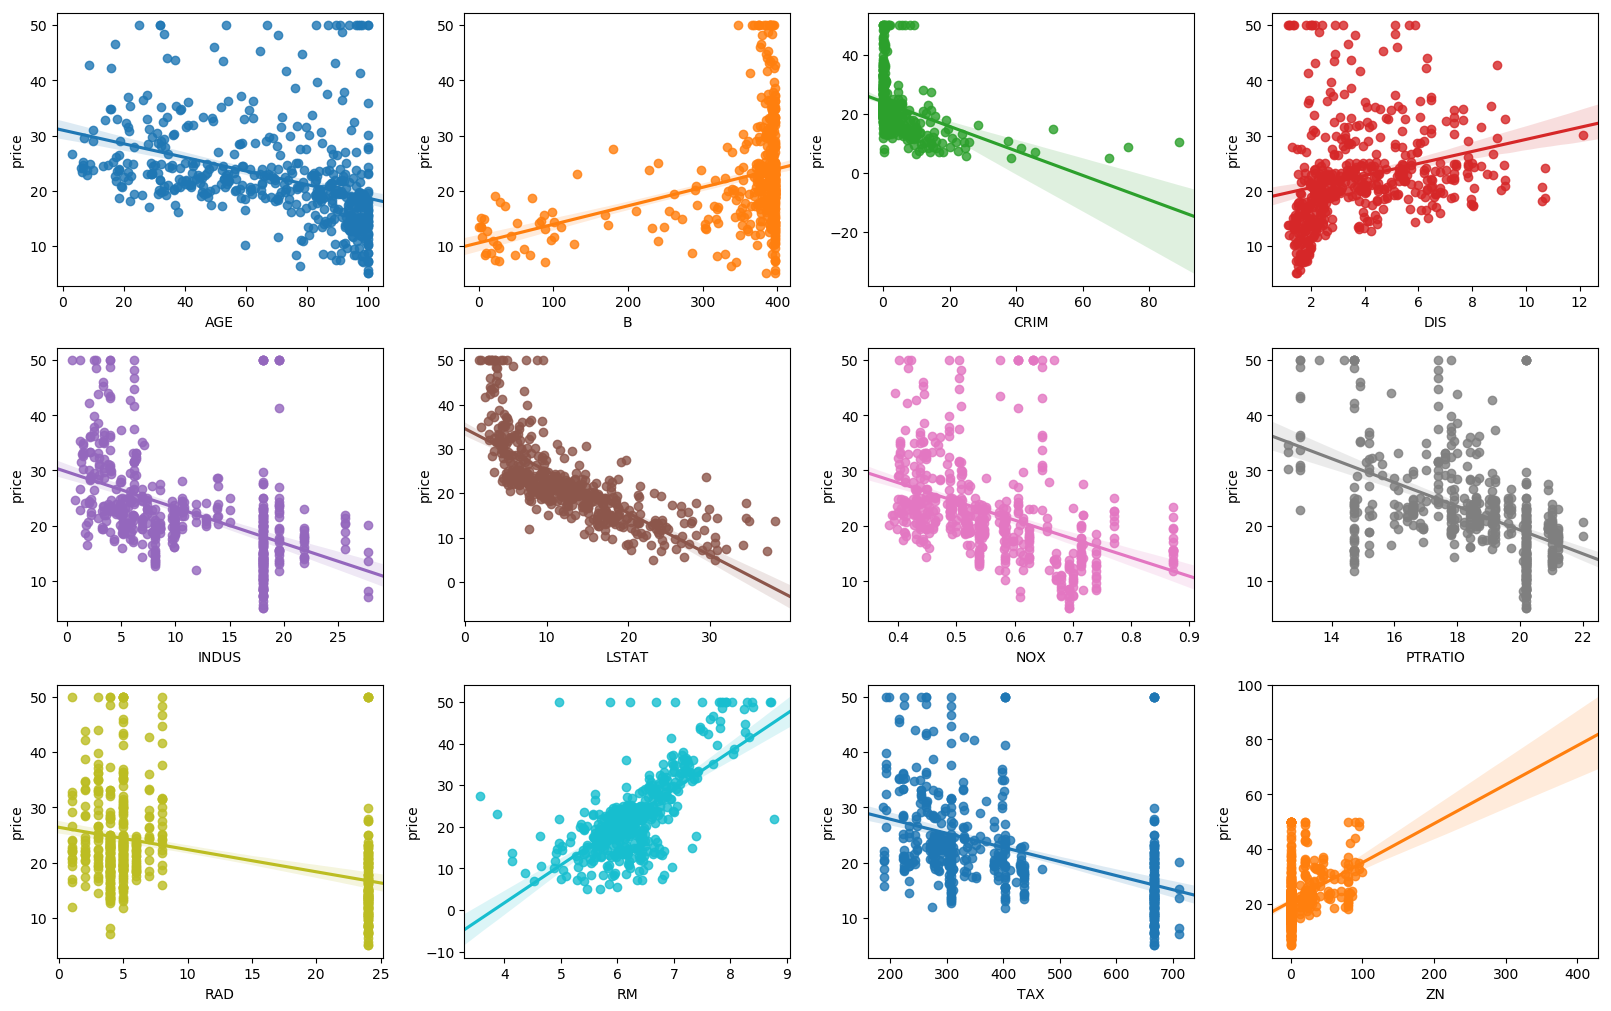

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10), ncols=4, nrows=3, constrained_layout=True) # 그래프 사이의 적절한 간격을 자동으로 설정
features = df.columns.difference(['price', 'CHAS'])

for i, feature in zip(range(12), features):
    row = i//4 # 행 번호 설정(몫)
    col = i%4      # 열 번호 설정(나머지)
    sns.regplot(x=feature, y=df.price, data=df, ax=ax[row][col])

#### 데이터 분할

In [39]:
df[df.columns.difference(['price'])].values

array([[ 65.2  , 396.9  ,   0.   , ...,   6.575, 296.   ,  18.   ],
       [ 78.9  , 396.9  ,   0.   , ...,   6.421, 242.   ,   0.   ],
       [ 61.1  , 392.83 ,   0.   , ...,   7.185, 242.   ,   0.   ],
       ...,
       [ 91.   , 396.9  ,   0.   , ...,   6.976, 273.   ,   0.   ],
       [ 89.3  , 393.45 ,   0.   , ...,   6.794, 273.   ,   0.   ],
       [ 80.8  , 396.9  ,   0.   , ...,   6.03 , 273.   ,   0.   ]])

In [60]:
from sklearn.model_selection import train_test_split
x = df[df.columns.difference(['price'])].values
y = df.price.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('학습 데이터셋 price 평균:', y_train.mean())
print('평가 데이터셋 price 평균:', y_test.mean())

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

학습 데이터셋 price 평균: 22.796534653465343
평가 데이터셋 price 평균: 21.488235294117644
X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


#### 전처리

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### 모델 학습

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

pred_train = linear.predict(X_train_scaled)

# 학습 데이터로 훈련한 모델의 예측 성능 평가
mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.31477
MSE:  21.64141
RMSE:  4.65203
R2:  0.75089


#### 성능평가 및 에측값 저장

In [63]:
X_test_scaled = scaler.transform(X_test)
pred = linear.predict(X_test_scaled)

# 테스트 데이터로 훈련한 모델의 예측 성능 평가
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.18909
MSE:  24.29112
RMSE:  4.92860
R2:  0.66876


In [64]:
pred_df = pd.DataFrame(pred, columns=['pred price'])
pred_df.head()

,pred price
0,28.996724
1,36.025565
2,14.816944
3,25.031979
4,18.769880


In [65]:
actual = pd.DataFrame(y_test, columns=['actual price'])
actual.head()

,actual price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [66]:
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.head()

,actual price,pred price
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880


### 분류분석
#### 데이터 확인

In [67]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() # iris 로드하기
iris_dt = iris.data # iris/data는 독립변수(feature)만으로 된 numpy 형태
iris_label = iris.target # isis.target은 종속변수(label) 값을 numpy 형태로 가짐

df = pd.DataFrame(data=iris_dt, columns=iris.feature_names)
df['Species'] = iris_label
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
df['Species'].unique()

array([0, 1, 2])

In [69]:
df.shape

(150, 5)

#### 데이터 분할

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dt, iris_label, test_size=0.2, random_state=0, stratify=iris_label)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


#### 전처리

In [75]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

#### 모델 학습

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100)

from sklearn.model_selection import cross_val_score

print('<max_depth = 5>')
scores = cross_val_score(dtree_clf_5, X_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도:', np.round(scores, 3))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))
print('\n')
print('<max_depth = 3>')
scores = cross_val_score(dtree_clf_3, X_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도:', np.round(scores, 3))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))
print('\n')
print('<max_depth = 1>')
scores = cross_val_score(dtree_clf_1, X_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도:', np.round(scores, 3))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

<max_depth = 5>
교차검증 정확도: [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 검증 정확도: 0.9417


<max_depth = 3>
교차검증 정확도: [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도: 0.925


<max_depth = 1>
교차검증 정확도: [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도: 0.6667


#### 성능평가 및 예측값 저장

In [83]:
dtree_clf_3.fit(X_train, y_train)
pred = dtree_clf_3.predict(X_test)
from sklearn.metrics import accuracy_score
print('의사결정나무(교차검증 후) 예측 정확도: {0:.5f}'.format(accuracy_score(y_test, pred)))

의사결정나무(교차검증 후) 예측 정확도: 0.93333


In [84]:
pred = pd.DataFrame(pred, columns=['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,1
4,0


In [85]:
actual = pd.DataFrame(y_test, columns=['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,0
3,2
4,0


In [86]:
classify_result = pd.concat([actual, pred], axis=1)
classify_result.head()

,actual Species,pred Species
0,0,0
1,1,1
2,0,0
3,2,1
4,0,0
